## Further Visualisation in Python

On Thursday, we covered some basics of visualisation in Python

* The essential plotting library, Matplotlib, and some built-in Pandas methods to create Matplotlib graphs
* Basic types of visualisation, and how to create them:
    * Scatter plots, line plots, bar charts/histograms, and 2d histograms
* Introduction to some building blocks of plots in Python
    * The figure object
    * Titles, axis labels, axis ticks
    * Legends and colourbars
* Introduction to customising the look of your plots
    * Customising your lines and markers
    * Colour-coding points by value
    * Transparency
    * Using colourmaps

Today, we will cover a few more types of plot, and some more advanced approaches which  which you can use to add further dimension and sophistication to your figures. 

First, let's pick up from where we left off on Thursday, and - very briefly! - introduce two new, useful, plotting methods. 

### Heatmaps Part II

On Thursday, we looked at creating heatmaps: 2D visualisations where the colour of the pixel at each ``(x,y)`` position in your plot is based on some third value, ``z``. ``Z`` may be a measured value, or some calculated function on ``x`` and ``y``. We created a heatmap of tree density in the City of Melbourne using the Matplotlib function pl.hist2d().

A more general tool for creating heatmaps is Matplotlibs ``pl.imshow()`` function. (Similar functions, ``pcolormesh()`` and ``matshow()`` are also available). This is a useful tool, but we'll work through it's basics quite quickly today to get onto more interesting things.

This function creates a heatmap *directly* from an array of numbers. So, we can pass it an array containing the values of ``z`` at each ``x`` and ``y``. I.e., there is no need to bin our values as we did with ``pl.hist2d()``. 

This function is easiest to understand with an example, so let's grab our essentional libraries, and invent an array of numbers:

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [3]:
z = [[0,1,2,1,0],
     [1,1,5,3,2],
     [2,5,10,5,2],
     [0,4,5,3,1],
     [0,0,1,1,0]]

With ``pl.imshow()``, creating a heatmap of this array is as simple as the following:

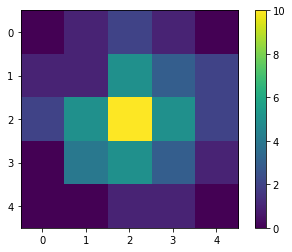

In [5]:
pl.imshow(z);

## Add a colorbar yourself to get the full picture:
pl.colorbar()

By default, the x and y axes are labelled not according to any intelligent x or y values, but according to the *locating indices* within the array for each pixel value - and the (0,0) position is, unusually, at *top* left. If this is not suitable, we can redefine our axis labels. For example, if we know that the array above represents measurements at each point x_i, y_j, where ``x = [1,2,3,4,5]`` and ``y = [11,12,13,14,15]``, we can pass this information to imshow() through the ``extent`` argument, which is a list defining the x and y limits of the plot area:

``extent = [leftmost limit of x, rightmost limit of x, lowermost limit of y, uppermost limit of y]``

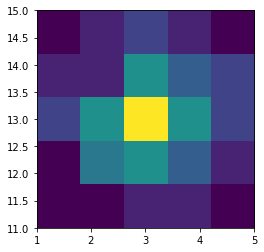

In [7]:
pl.imshow(z, extent = [1,5,11,15]);
pl.colorbar;

Or, it is often helpful to shift your limits a little (typically half a tick step), to position the ticks appropriately in the centre of the pixels, rather than the default (in the pixel corner).

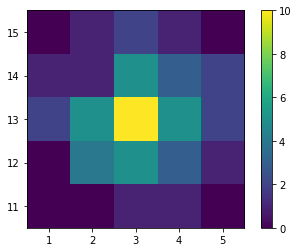

In [8]:
pl.imshow(z, extent = [0.5,5.5,10.5,15.5]);
pl.colorbar();

An extremely closely related plotting method is ``pl.contour()``, which (similarly) draws density/intensity *contours* based on an array.

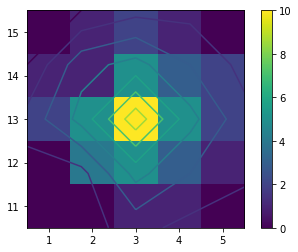

In [110]:
pl.imshow(z, extent = [0.5,5.5,10.5,15.5])
pl.colorbar()
pl.contour(z, extent = [0.5,5.5,10.5,15.5]);

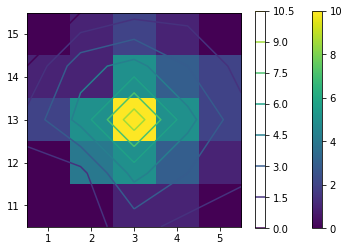

In [10]:
# Try the last cell again, but move the colorbar creation to the end of the cell. What's going on now?
pl.imshow(z, extent = [0.5,5.5,10.5,15.5])
pl.colorbar()
pl.contour(z, extent = [0.5,5.5,10.5,15.5]);
pl.colorbar()
# What about if you leave in the existing colorbar call, and *add another* to the end of the cell?

Let's try a quick last heatmap example with real data; a City of Melbourne datafile describing the locations, ages, and sizes of buildings across the city.

We'll create a heatmap showing how building heights correlate with age.

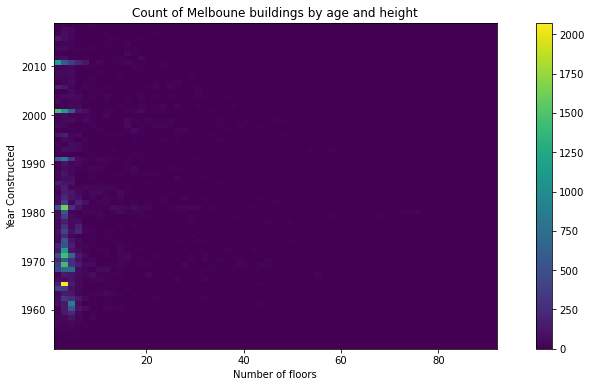

In [13]:
# Read in the data
df = pd.read_csv('Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv')

# Filter for buildings constructed the last ~80 years, just for tractability. 
# Try taking this out later if you want to play around.

df = df.loc[df['Construction year'] > 1950]

# We'll first set up some lists of our unique years and sizes, so we can manually find
# the count of buildings corresponding to each pixel. It's important to sort these so our
# axes come out in the correct time/size order!

construction_years = sorted( df['Construction year'].unique() )
n_floors = sorted( df['Number of floors (above ground)'].unique() )

# We'll initialise our pixel array to zeros, and give it the dimensions of our x by our y
pixel_array = np.zeros( (len(construction_years), len(n_floors) ))

# Now we wish to obtain an array containing the number of matching buildings for each x and 
# y value in our parameter space
# For the sake of explicit illustration, we'll do this by iterating over all the pixel locations
# (x,y) and find the number of matching buildings

for i_index, year in enumerate(construction_years):
    for j_index, floorcount in enumerate(n_floors):

        pixel_array[i_index][j_index] = len( df.loc[ (df['Construction year'] == year) & ( df['Number of floors (above ground)'] == floorcount) ])


pl.figure(figsize=(14,6))

pl.imshow(pixel_array, extent=[np.min(n_floors), np.max(n_floors), np.min(construction_years), np.max(construction_years)])
pl.colorbar()

pl.xlabel('Number of floors')
pl.ylabel('Year Constructed')
pl.title('Count of Melboune buildings by age and height');

This gives us a bit of a sense of the data, but it's hard to really see.

One useful trick (as Steve pointed out on Thursday) is to rescale your pixel values to a log scale. Then, pixels which are 0 drop out*, and only the non-null pixels contribute to the calculation of the colour scaling. This makes the data structure much more visible:

**This will throw a warning, but in this situation (since we are causing it knowingly) we can ignore it. Although we should always pay close attention to warnings, they are not fatal errors, and do not kill the code.*

Try it yourself: use numpy's ``log(x)`` function (where x is array-like), to rescale the pixel array.


<ipython-input-14-fa6437d63a05>:1: RuntimeWarning: divide by zero encountered in log
  pixel_array = np.log(pixel_array)


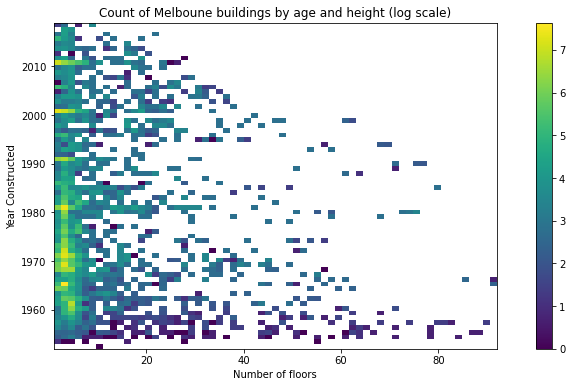

In [14]:
pixel_array = np.log(pixel_array)

pl.figure(figsize=(14,6))

# If you are interested, change the extent argument to try adjusting the limits of the plot by half a pixel
# in either direction, as we did above

pl.imshow(pixel_array, extent=[np.min(n_floors), np.max(n_floors),np.min(construction_years), np.max(construction_years)])
pl.colorbar()

pl.xlabel('Number of floors')
pl.ylabel('Year Constructed')
pl.title('Count of Melboune buildings by age and height (log scale)');

We can label some points of interest with another useful method: ``pl.text()``.

The syntax for this method is ``pl.text(x_position, y_position, 'Text')``, which will annotate the string 'Text' at the position ``(x_position, y_position)``.

We can use this, for example, to label the Collins Tower (built 1981; 52 floors), and the Tivoli Arcade (built 1970; 17 floors).

We should also add markers at these points to make it clear what the labels refer to.

*Try extending the sample_floors, sample_builddates, and sample_names lists to add other text markers to the plot. You can use the information of real buildings from the dataframe, or just make up some test ones of your own. Bonus: what happens if you stick on a building whose (x,y) coordinates are outside the normal ``extent``?*


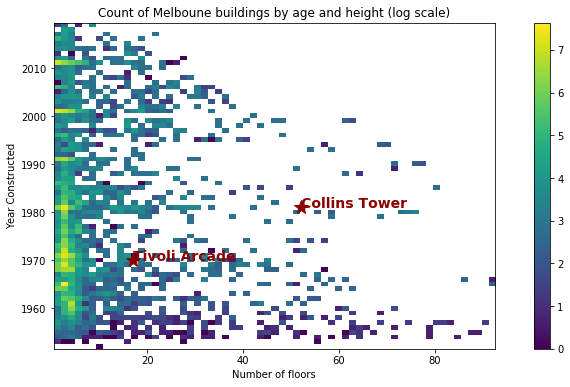

In [83]:
pl.figure(figsize=(14,6))

pl.imshow(pixel_array, extent=[np.min(n_floors)-0.5, np.max(n_floors)+0.5,np.min(construction_years)-0.5, np.max(construction_years)+0.5])
pl.colorbar()

sample_floors = [52,17]
sample_builddates = [1981,1970]
sample_names = ["Collins Tower", "Tivoli Arcade"]

for i in range(len(sample_floors)):
    pl.plot(sample_floors[i], sample_builddates[i], '*',color='darkred',markersize=15)
    pl.text(sample_floors[i], sample_builddates[i], sample_names[i], fontweight = 'bold', fontsize=14, color = 'darkred')

pl.xlabel('Number of floors')
pl.ylabel('Year Constructed')
pl.title('Count of Melboune buildings by age and height (log scale)');

### Boxplots

The last new type of plot we'll see is the familiar boxplot (AKA Tukey plot, or box and whisker plot). The method for this is ``pl.boxplot(x)``.

This is a very simple plot, but a great format for a concise statistical overview of numerical data. It can be called simply by passing a vector of numerical data:

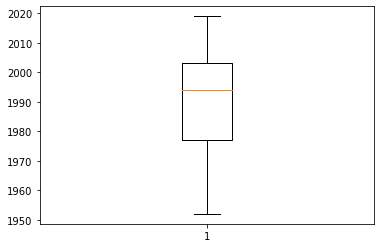

In [48]:
pl.boxplot(df['Construction year']);

But, as usual, we can control the appearance in a number of ways. The below is just a tiny sample: see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html for more ideas

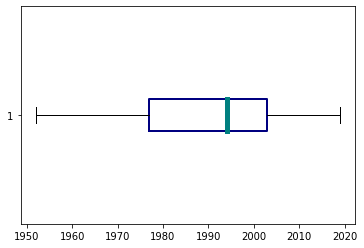

In [18]:
pl.boxplot(df['Construction year'], boxprops = {'color':'navy', 'linewidth':2}, medianprops = {'color' : 'teal', 'linewidth': 5}, vert=False);

### Increasing the dimensionality of your visualisations

What if we could combine these different views of the data into a single informational figure? This is often incredibly advantageous.

One way this is possible in Python is using Matplotlib's ``pl.subplot()`` methods. These let us add multiple plots to the same figure.

There is more than one way to call these methods, but we'll show a basic one here.

This method relies on the concept of figure "axes". An "Axes" object is the "plot space", or "data space" component of our figure, and is a very powerful tool we haven't yet really delved into. 

Crucially, **our figure objects can contain more than one axes object.** These axes objects are the *subplots* for our figure.

When we work with multiple subplots, we need be conscious of *which* axes object our plotting calls will work on. To be careful, we would normally name each of them individually.

Then, we can adjust the scope of our plotting commands, so that instead of working on "the whole plot", eg:
* ``pl.plot(a,b,'ro')``

We explicitly call them on the axes object where we want them:
* ``ax.plot(a,b,'ro')``

Many commands we have learned translate directly, and can be used in either sense; in some cases, axes operations require their own special methods.

This will all make more sense with some examples:

First, we initialise our figure and give the figure object a name. 

Then, we add two axes objects, by operating the add_subplot() method on our figure object.

The add_subplot method takes an argument which tells it the *dimensions* of the subplot layout we have in mind. We can pass this argument in multiple formats, but usually we would use a three-digit number, where the three digits represent:

* First digit: the number of rows you want in your subplot grid
* Second digit: the number of columns you want in your subplot grid
* Third digit: the 1-indexed position in the subplot grid which you want your axis to occupy. This counts from top left, working first right and then down. 


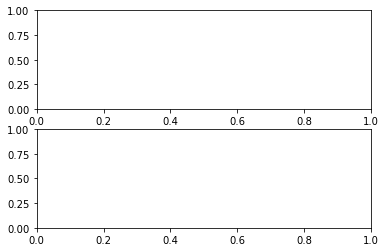

In [16]:
fig = pl.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

Let's test this on a real example, to see why we'd bother with the above:

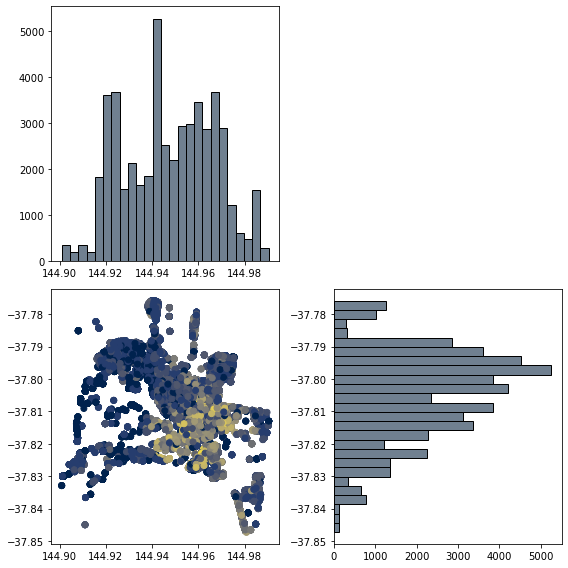

In [17]:
# First, we initialise a nice big figure container

fig = pl.figure(figsize=(8,8))

x = df['x coordinate']
y = df['y coordinate']
z = np.log(df['Number of floors (above ground)'])

# Now we initialise a grid of 4 subplots: 2 rows by 2 columns
# Note that we don't need to initialise a subplot at every position in our 2x2 layout
# We just need to be careful that we use the same mxn grid definition for all the axes
# we wish to add; otherwise things can get confused

ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# We'll put a scatter plot of Melbourne's buildings on the bottom-left axis. 
# I've colour-coded on log building height (z above), for visual interest

ax3.scatter(x,y,c=z,cmap='cividis')

# Now, show the latitude distribution of the buildings as a histogram at bottom right...

ax4.hist(y,orientation = 'horizontal',edgecolor='k',facecolor='slategrey',align = 'mid',bins=25)

# And the longitude distribution of the buildings as a histogram at top left
ax1.hist(x,edgecolor='k',facecolor='slategrey',align = 'mid',bins=25);

pl.tight_layout()

We can improve this plot with some careful tailoring. Watch how we now operate on the *axes* individually, and notice how some of the methods change: for example, where we used to set plot limits using:

* ``pl.xlim( (lower_limit,upper_limit) )``

To set limits on an axes object, we use instead:

* ``ax.set_xlim( (lower_limit,upper_limit) )

You will get a sense for which to use when (usually when you get an error like ``"Plot object has no attribute "some_function_name" "``, and you find yourself thinking: "what? ``some_function_name`` is a real function!").

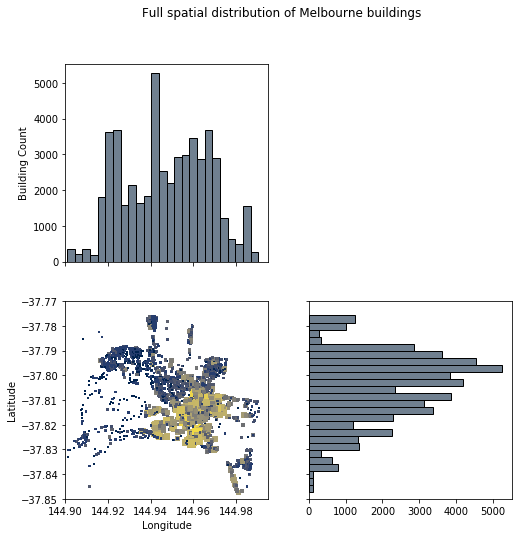

In [144]:
# First, we initialise a nice big figure container

fig = pl.figure(figsize=(8,8))

x = df['x coordinate']
y = df['y coordinate']
z = np.log(df['Number of floors (above ground)'])

zz = df['Number of floors (above ground)']

# Now we initialise some subplots
ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax3.scatter(x,y,c=z,cmap='cividis',s=zz,marker='s')
ax3.ticklabel_format(useOffset=False);
ax3.set_xlim((144.9,144.995))
ax3.set_ylim((-37.85,-37.77))
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')


ax4.hist(y,orientation = 'horizontal',edgecolor='k',facecolor='slategrey',align = 'mid',bins=25)
ax4.set_ylim((-37.85,-37.77))
ax4.set_yticklabels([])

ax1.hist(x,edgecolor='k',facecolor='slategrey',align = 'mid',bins=25)
ax1.set_xlim((144.9,144.995))
ax1.set_xticklabels([])
ax1.set_ylabel('Building Count');

pl.suptitle('Full spatial distribution of Melbourne buildings');

It is also possible to customise your subplot layouts beyond a simple grid; for example, to make some subplots different shapes or sizes. There are a number of ways to do this, but the gridspec library is a common tool: https://matplotlib.org/1.3.1/users/gridspec.html .

Don't worry about this for now, though, unless you're interested.

### Exercise 1

* Read in the entire buildings dataframe 'Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv'; *don't* filter it to buildings constructed since 1950.
* Drop rows where no year of construction is present; and where the year is nan or zero
* Add a column "building_age" to your dataframe, by calculating the time between construction and now
* Create a 12x6 figure.
* Add three subplots to your figure, next to each other horizontally .
* On the first subplot, create a histogram of building ages
* On the second subplot, create a boxplot of building ages
* On the third subplot, create a scatterplot of building positions, and color-code markers by age
* Tinker with the appearance of the figure and it's axes - if you are interested

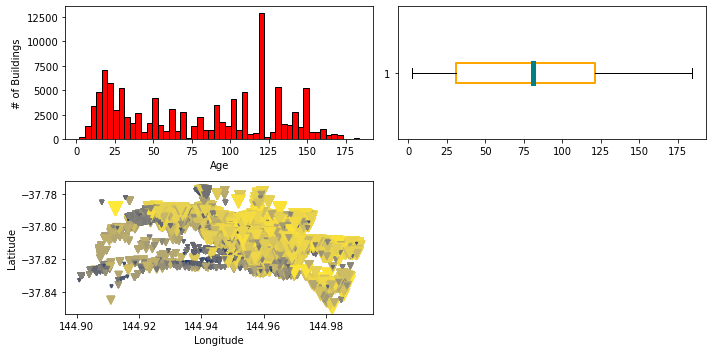

In [66]:
# Your own subplot-based exploration of Melbourne's building ages goes here:
df = pd.read_csv('Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv')
df = df.loc[(df['Construction year']!=0.0) & (~df['Construction year'].isna())]
df['age'] = 2021 - buildings['Construction year']

fig = pl.figure(figsize = (10,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.hist(df['age'], edgecolor='k', facecolor='red',align = 'mid',bins=50)
ax1.set_xlabel('Age')
ax1.set_ylabel('# of Buildings')

ax2.boxplot(df['age'], boxprops = {'color':'orange', 'linewidth':2}, medianprops = {'color' : 'teal', 'linewidth': 5}, vert=False);

x = df['x coordinate']
y = df['y coordinate']
z = np.log(df['age'])
zz = df['age']
ax3.scatter(x,y,c=z,cmap='cividis',s=zz,marker='v')
ax3.ticklabel_format(useOffset=False);
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

pl.tight_layout()

### Moving to three dimensions (and, "projections")

In the discussions so far, we've often used colouring, sizing, or similar techniques, to add a "third dimension" of information to our 2D visualisations. 

These are incredibly useful techniques, and are often the best, cleanest, and most publication-/reader-friendly way of showing three dimensions.

However, there are other applications where the best option is an actual three-dimensional visualisation. These are simple to make now that we're familiar with axes objects:

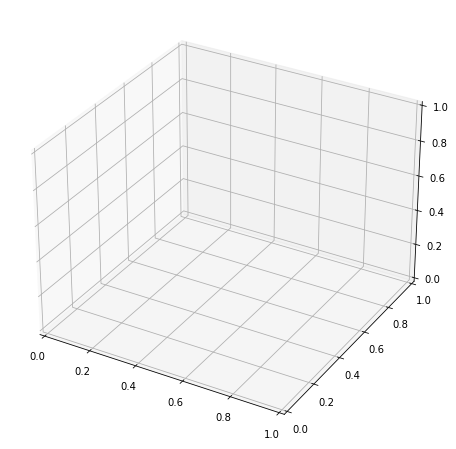

In [37]:
#from mpl_toolkits.mplot3d import Axes3D   #This is a part of Matplotlib where the '3D' projection used below lives

fig = pl.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

Axis *projections*, like we have used here are, can basically be thought of as telling Python the "topology" of our data space; or, as telling Python to map data space to display space in some way that's not just "normal 2D cartesian".

The above is a 3D example; but we can also use projections to get things like polar plots or various geographic coordinate systems (normally using the ``basemap`` library).

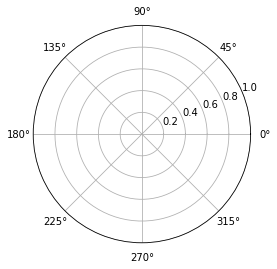

In [125]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='polar')

Back to 3D for now, though.

On a 3D axis, we can call some of our methods the same way we always have, and simply add a 'z' dimension where appropriate:

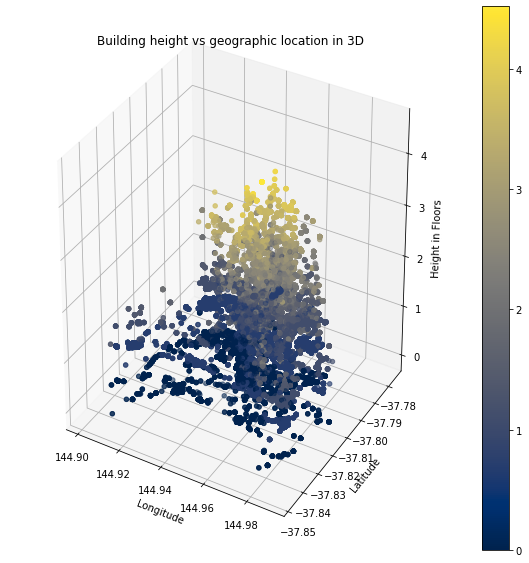

In [134]:
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scattered = ax.scatter(x,y,z,c=z,cmap='cividis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height in Floors')

fig.colorbar(scattered);
pl.title('Building height vs geographic location in 3D');

When we work outside Jupyter, we can interact with 3D plots, and rotate them (change the viewing angle) with the mouse. This makes them a great way to explore your data, or a visually-impressive way to show it off.

However, getting interactive rotation to work in Jupyter can be pretty finnicky, so we'll try it elsewhere:

### Exercise 2:

Recreate the plot above (or make a 3d scatter of any points you like) using Pycharm or the Python console. 

NB: if you can't get any form of interactive rotation to work, you can also manually change the viewing angle by setting the azimuth and elevation from which you want to view the plot. Try changing the view azimuth and elevation below, to get a feel for what they do:

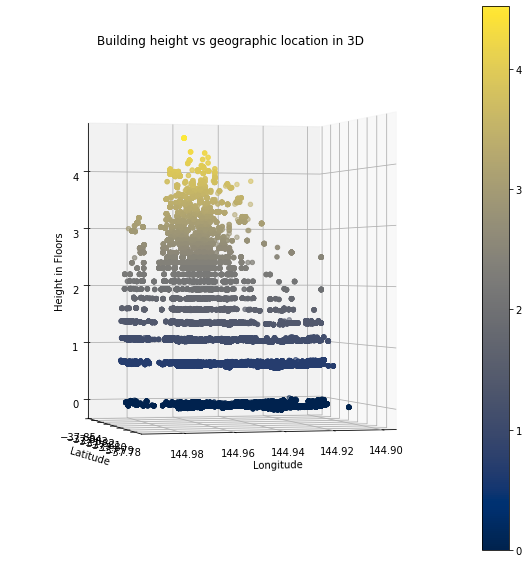

In [142]:
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scattered = ax.scatter(x,y,z,c=z,cmap='cividis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height in Floors')

fig.colorbar(scattered);
pl.title('Building height vs geographic location in 3D');

azimuth = 75
elevation = 0

ax.view_init(elevation, azimuth)

### Bonus optional exercise if you are speedy and/or enthusiastic:

Copy and run (for best results, not in Jupyter) one of the 3D examples from the Matplotlib example gallery. 

Try: https://matplotlib.org/3.1.1/gallery/mplot3d/wire3d.html#sphx-glr-gallery-mplot3d-wire3d-py

Or: https://matplotlib.org/3.1.1/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py

Or even: https://matplotlib.org/3.1.1/gallery/frontpage/3D.html#sphx-glr-gallery-frontpage-3d-py

